<h1 style="
  font-size: 55px; 
  text-align: center; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px rgba(70, 145, 196, 0.84);
  letter-spacing: 2px;
">
  <b>📊 Data Visualization</b>
</h1>
<hr style="width: 60%; border: 2px solid rgba(25, 58, 80, 0.85); border-radius: 5px;">


#### **=> Tasneem Hussein**
---

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 600;
  letter-spacing: 0.5px;
">
  <b>Import Libraries</b>?
</h4>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_merged_data.csv')
df.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,LOAN_ACTIVITY_SCORE,RATIO_AMT_CREDIT
0,1,Cash loans,M,202500.0,Working,Secondary / secondary special,Single / not married,House/apartment,Labor,1.0,...,Approved,606,Cash through the bank,New,POS,Stone,24.0,Middle,2,0.440373
1,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,746,Cash through the bank,Repeater,Cash,Credit and cash offices,12.0,Low,2,0.800834
2,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,828,Cash through the bank,Refreshed,POS,Stone,6.0,High,2,0.269530
3,0,Cash loans,F,270000.0,Others,Higher education,Married,House/apartment,Admin,2.0,...,Approved,2341,Cash through the bank,Refreshed,POS,Country-wide,12.0,High,2,0.052612
4,0,Revolving loans,M,67500.0,Working,Secondary / secondary special,Single / not married,House/apartment,Labor,1.0,...,Approved,815,Cash through the bank,New,POS,Regional / Local,4.0,High,2,0.148932


<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q16 :What is the relationship between the number of years employed and the decision outcome?</b>
</h4>


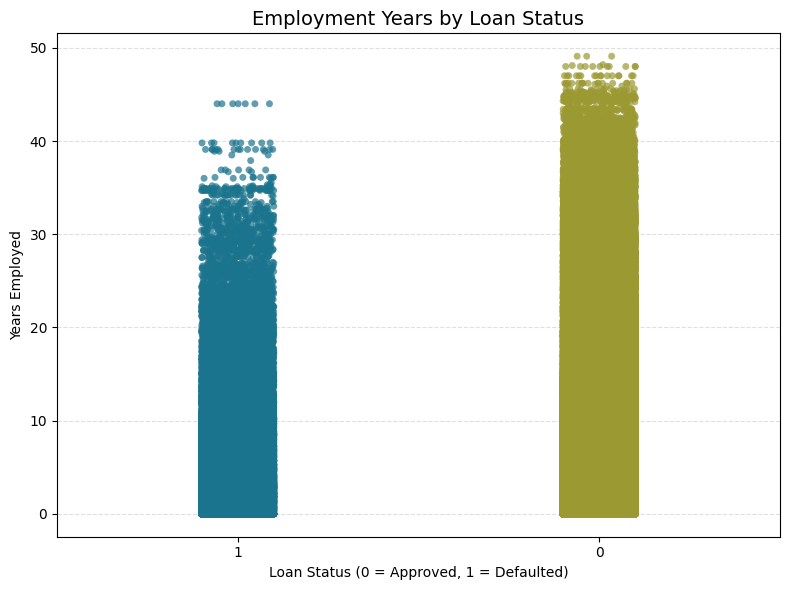

In [28]:
df['TARGET'] = df['TARGET'].astype(str)

plt.figure(figsize=(8,6))
sns.stripplot(
    data=df,
    x='TARGET',
    y='YEARS_EMPLOYED',
    hue='TARGET',
    palette={
        '0': "#9B9932",   # Approved
        '1': (27/255, 116/255, 141/255, 0.84)    # Defaulted
    },
    jitter=True,
    alpha=0.7,
    size=5,
    legend=False
)

plt.title('Employment Years by Loan Status', fontsize=14)
plt.xlabel('Loan Status (0 = Approved, 1 = Defaulted)')
plt.ylabel('Years Employed')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q17: Does the type of organization affect the likelihood of approval?</b>
</h4>


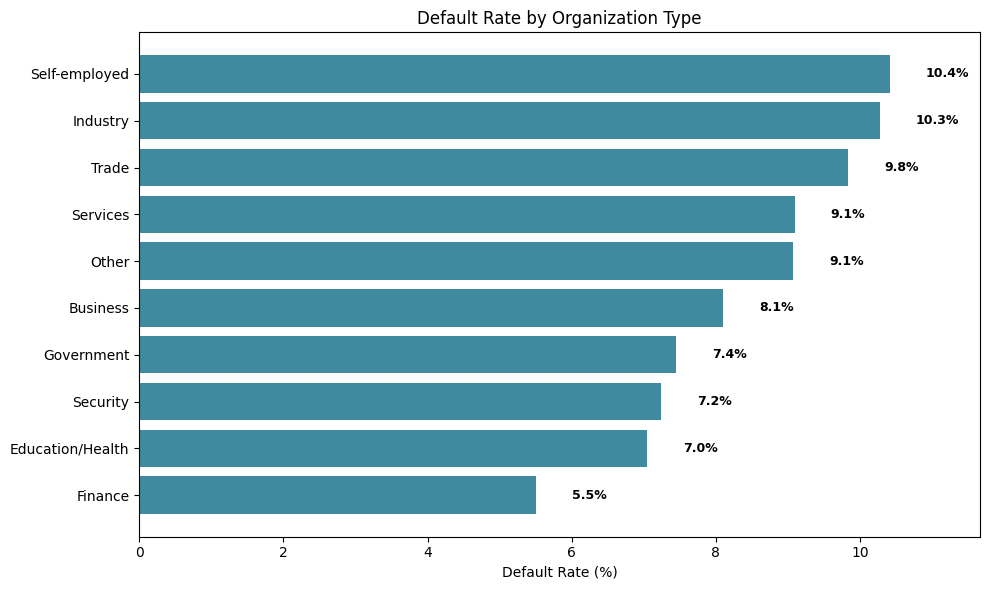

In [19]:
df = df.copy()
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda v: v.decode() if isinstance(v, (bytes, bytearray)) else (str(v) if pd.notna(v) else None))
ct = df.dropna(subset=['ORGANIZATION_TYPE', 'TARGET']).groupby('ORGANIZATION_TYPE')['TARGET'].agg(['mean', 'count']).reset_index()
ct = ct[ct['count'] >= 5]
ct = ct.sort_values('mean', ascending=False)
x = ct['mean'] * 100
y = ct['ORGANIZATION_TYPE']

plt.figure(figsize=(10,6))
bars = plt.barh(y, x, color=(27/255, 116/255, 141/255, 0.84))
plt.gca().invert_yaxis()
for i, v in enumerate(x):
    plt.text(v + max(0.5, x.max()*0.01), i, f"{v:.1f}%", va='center', fontsize=9, weight='bold', color='black')
plt.xlabel('Default Rate (%)')
plt.title('Default Rate by Organization Type')
plt.xlim(0, max(10, x.max() * 1.12))
plt.tight_layout()
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q18: Do clients who recently changed jobs face higher rejection rates?</b>
</h4>

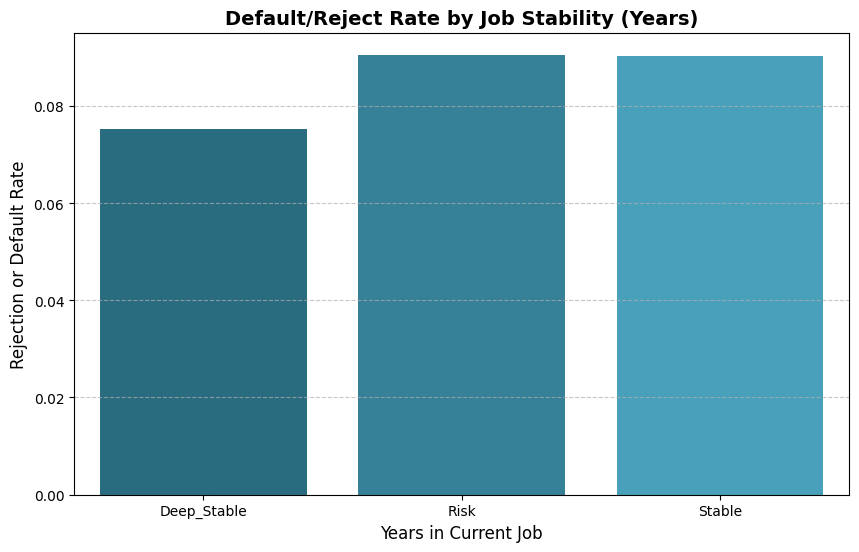

In [20]:
base_color = np.array([27/255, 116/255, 141/255, 0.84])  
lighter_color = np.array([53/255, 170/255, 206/255, 0.84]) 

num_bars = df['STABILITY_YEARS'].nunique()

palette = [
    tuple(base_color + (lighter_color - base_color) * (i / max(1, num_bars - 1)) ** 1.3)
    for i in range(num_bars)
]

stability_default = df.groupby('STABILITY_YEARS')['TARGET'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='STABILITY_YEARS',
    y='TARGET',
    data=stability_default,
    hue='STABILITY_YEARS',
    palette=palette,
    dodge=False,
    legend=False
)

plt.title('Default/Reject Rate by Job Stability (Years)', fontsize=14, fontweight='bold')
plt.xlabel('Years in Current Job', fontsize=12)
plt.ylabel('Rejection or Default Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q19: Does the day of the week affect the approval rate?</b>
</h4>

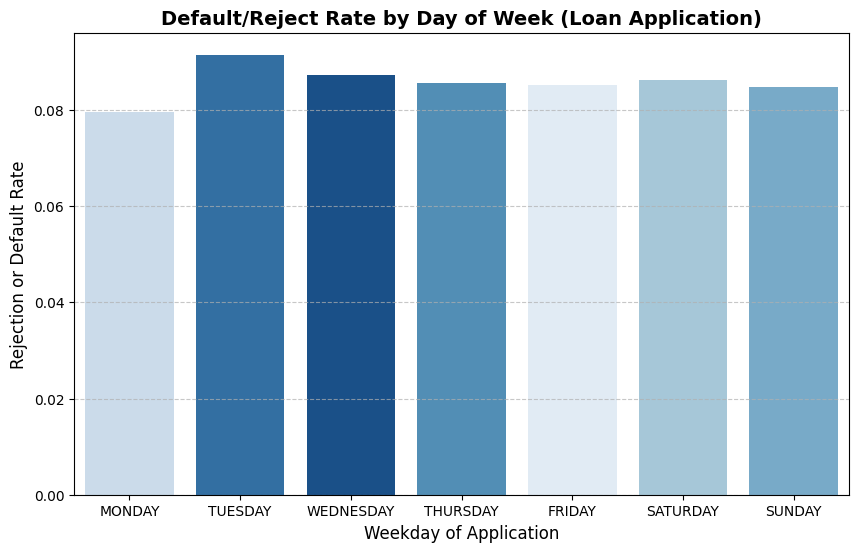

In [21]:
weekday_default = df.groupby('WEEKDAY_APPR_PROCESS_START_x')['TARGET'].mean().reset_index()

order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

plt.figure(figsize=(10,6))
sns.barplot(
    x='WEEKDAY_APPR_PROCESS_START_x',
    y='TARGET',
    data=weekday_default,
    hue='WEEKDAY_APPR_PROCESS_START_x',
    palette='Blues',
    order=order,
    dodge=False,
    legend=False
)

plt.title('Default/Reject Rate by Day of Week (Loan Application)', fontsize=14, fontweight='bold')
plt.xlabel('Weekday of Application', fontsize=12)
plt.ylabel('Rejection or Default Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4 style="
  color: rgba(53, 170, 206, 0.84);
  font-family: 'Poppins', sans-serif;
  font-weight: 900;
  letter-spacing: 0.5px;
">
  <b>Q20 :What is the relationship between the wealth index and the approval rate?</b>
</h4>

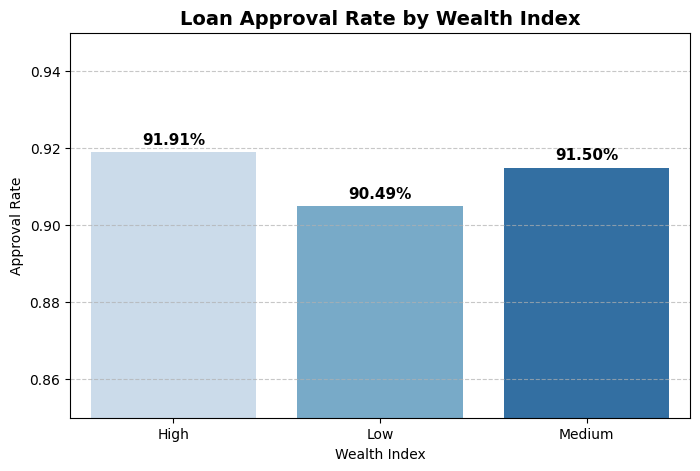

In [22]:
wealth_approval = df.groupby('WEALTH')['TARGET'].apply(lambda x: 1 - x.mean()).reset_index()
wealth_approval.columns = ['WEALTH', 'Approval Rate']

plt.figure(figsize=(8,5))
sns.barplot(
    x='WEALTH',
    y='Approval Rate',
    data=wealth_approval,
    hue='WEALTH',       
    dodge=False,
    legend=False,
    palette=sns.color_palette("Blues", n_colors=3)
)

for i, val in enumerate(wealth_approval['Approval Rate']):
    plt.text(i, val + 0.002, f"{val:.2%}", ha='center', fontsize=11, fontweight='bold')

plt.ylim(0.85, 0.95)
plt.title('Loan Approval Rate by Wealth Index', fontsize=14, fontweight='bold')
plt.xlabel('Wealth Index')
plt.ylabel('Approval Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()